In [1]:
import numpy as np
import torch
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### Utilities

The test function that is used for illustrating the workings of the optimisers.

In [2]:
def test_function(x):
    return x[0]**2/15.0+x[1]**2

Utility for plotting the contours of a given function`f` in a range `r` (4-tuple) and 20 levels up to a max level given by `s`. 

In [3]:
def plot_contours(r, s, f):
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'
    delta = 0.01
    X = np.arange(r[0], r[1], delta)
    Y = np.arange(r[2], r[3], delta)
    X,Y = np.meshgrid(X, Y)  
    XX = np.stack((X,Y), axis=0)
    Z=f(XX)
    V=np.arange(0.2,s,s/20)**2
    #CS = plt.contour(X, Y, Z, V, colors=colors)
    #plt.clabel(CS, inline=1, fontsize=10)
    CS = plt.contour(X, Y, Z, V)

Optimisation (i.e. minimisation) of the function `f` starting at `x` (pytorch tensor), by using the given `optimizer` over`nepochs`epochs.  

In [4]:
def optimize(f, x, nepochs, optimizer):
    params = [x,]
    xhist = [x[0].item()]
    yhist = [x[1].item()]
    optimizer.param_groups[0]['params'] = params
    for i in range(nepochs):
        y = f(x)
        optimizer.zero_grad()
        y.backward()
        optimizer.step()
        xhist.append(x[0].item())    
        yhist.append(x[1].item())
    return xhist, yhist

RMS error for measuring the discrepancy to the final target (for the test function above it is (0,0). 

In [5]:
def error(xhist,yhist):
    x,y = xhist[-1], yhist[-1]
    return "%6.3f, (%6.3f, %6.3f)"%(np.sqrt(x**2+y**2),x,y)

### Sample Run

SGD - lr=0.3   1.326, (-1.326, -0.000)


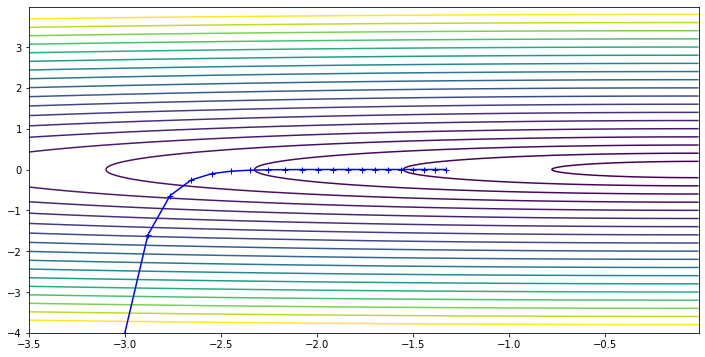

In [19]:
nepochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

# initial value
x = torch.tensor([-3.0,-4.0]).requires_grad_()

optimizer = torch.optim.SGD([x],lr=.3)
xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

plt.plot(xhist,yhist,"b-+", label="lr=0.3")
print("SGD - lr=0.3 ", error(xhist,yhist))


### Tasks 

For better comparison, always use the same (non-optimal) initial point.  

* Study SGD for different learning rates.
* Compare Momentum for different momentum parameters and characterise how the optimisation paths qualitatively change.
* Can you spot a difference with / without Nesterov? 
* Play with different settings for the parameter $\beta_1$ and characterise how the optimisation paths qualitatively change.
* Finally, check different settings for Adam. Experiment with different learning rates. Can you experimentally verify that Adam is less sensitive to the choice of the learning rate than e.g. SGD?
* Identify your best parameters for each of the models above - for the given example. How many steps are needed with these settings to reach the minimum of the function at (0,0) within an accuracy of 1.0e-3


## SGD

In [77]:
def get_costs_sgd(lr, momentum = 0, nesterov = False, nepochs = 20):
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    optimizer = torch.optim.SGD([x], lr=lr, momentum=momentum, nesterov=nesterov)
    return optimize(test_function, x, nepochs, optimizer)

SGD - lr=0.15  2.003, (-2.003, -0.003)
SGD - lr=0.3  1.326, (-1.326, -0.000)
SGD - lr=0.6  0.566, (-0.566, -0.000)
SGD - lr=0.75  0.365, (-0.365, -0.000)
SGD - lr=0.9  0.237, (-0.233, -0.046)


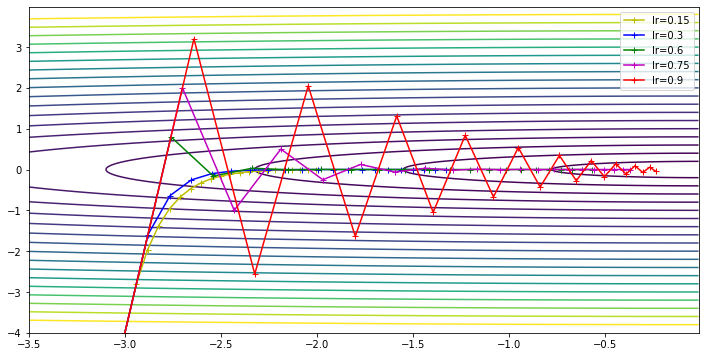

In [66]:
xhist015, yhist015 = get_costs_sgd(0.15)
xhist03, yhist03 = get_costs_sgd(0.3)
xhist06, yhist06 = get_costs_sgd(0.6)
xhist075, yhist075 = get_costs_sgd(0.75)
xhist09, yhist09 = get_costs_sgd(0.9)

plt.figure(2, figsize=(12, 6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)
plt.plot(xhist015, yhist015, 'y-+', label='lr=0.15')
plt.plot(xhist03, yhist03, 'b-+', label='lr=0.3')
plt.plot(xhist06, yhist06, 'g-+', label='lr=0.6')
plt.plot(xhist075, yhist075, 'm-+', label='lr=0.75')
plt.plot(xhist09, yhist09, 'r-+', label='lr=0.9')
plt.legend()
print('SGD - lr=0.15', error(xhist015, yhist015))
print('SGD - lr=0.3', error(xhist03, yhist03))
print('SGD - lr=0.6', error(xhist06, yhist06))
print('SGD - lr=0.75', error(xhist075, yhist075))
print('SGD - lr=0.9', error(xhist09, yhist09))

The higher the learning rate, the more jumping around during the learning process. But, the target value is also achieved faster.

SGD - m=0.1  1.209, (-1.209, -0.000)
SGD - m=0.3  0.921, (-0.921, -0.000)
SGD - m=0.5  0.532, (-0.532, -0.002)
SGD - m=0.7  0.009, ( 0.009, -0.003)
SGD - m=0.9  1.187, ( 0.827,  0.852)


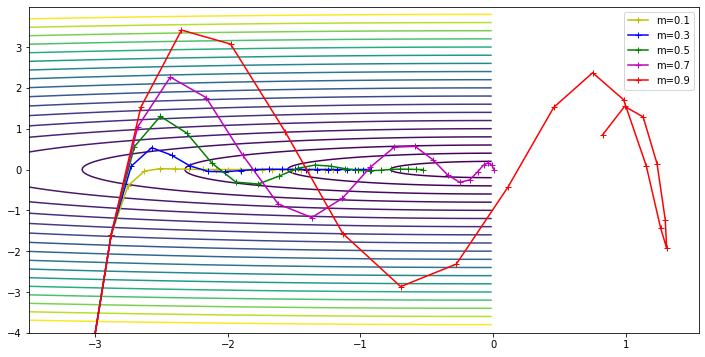

In [67]:
xhist0301, yhist0301 = get_costs_sgd(0.3, 0.1)
xhist0303, yhist0303 = get_costs_sgd(0.3, 0.3)
xhist0305, yhist0305 = get_costs_sgd(0.3, 0.5)
xhist0307, yhist0307 = get_costs_sgd(0.3, 0.7)
xhist0309, yhist0309 = get_costs_sgd(0.3, 0.9)

plt.figure(3, figsize=(12, 6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)
plt.plot(xhist0301, yhist0301, 'y-+', label='m=0.1')
plt.plot(xhist0303, yhist0303, 'b-+', label='m=0.3')
plt.plot(xhist0305, yhist0305, 'g-+', label='m=0.5')
plt.plot(xhist0307, yhist0307, 'm-+', label='m=0.7')
plt.plot(xhist0309, yhist0309, 'r-+', label='m=0.9')
plt.legend()
print('SGD - m=0.1', error(xhist0301, yhist0301))
print('SGD - m=0.3', error(xhist0303, yhist0303))
print('SGD - m=0.5', error(xhist0305, yhist0305))
print('SGD - m=0.7', error(xhist0307, yhist0307))
print('SGD - m=0.9', error(xhist0309, yhist0309))

The learning process becomes more efficient with increased momentum, at least up to a certain point. It can apparently happen that the learning process overshoots and goes into the wrong direction before turning back again.

SGD - m=0.6  0.026, ( 0.026, -0.001)
SGD - m=0.6n  0.003, ( 0.003, -0.000)


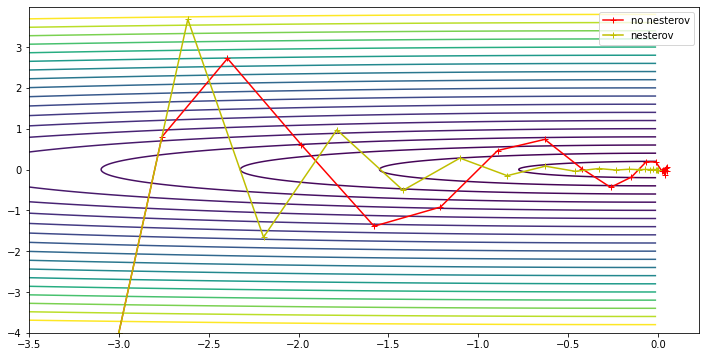

In [68]:
xhist0606, yhist0606 = get_costs_sgd(0.6, 0.6)
xhist0606n, yhist0606n = get_costs_sgd(0.6, 0.6, True)

plt.figure(4, figsize=(12, 6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)
plt.plot(xhist0606, yhist0606, 'r-+', label='no nesterov')
plt.plot(xhist0606n, yhist0606n, 'y-+', label='nesterov')
plt.legend()
print('SGD - m=0.6', error(xhist0606, yhist0606))
print('SGD - m=0.6n', error(xhist0606n, yhist0606n))

The learning process with Nesterov is more efficient after only a small number of epochs compared to the same optimization approach without Nesterov.

## Adam

In [79]:
def get_costs_adam(lr, nepochs = 20):
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    optimizer = torch.optim.Adam([x], lr=lr)
    return optimize(test_function, x, nepochs, optimizer)

SGD - lr=0.3  1.046, ( 0.813,  0.658)
SGD - lr=0.6  0.643, (-0.319,  0.558)
SGD - lr=0.9  1.037, (-0.685, -0.778)


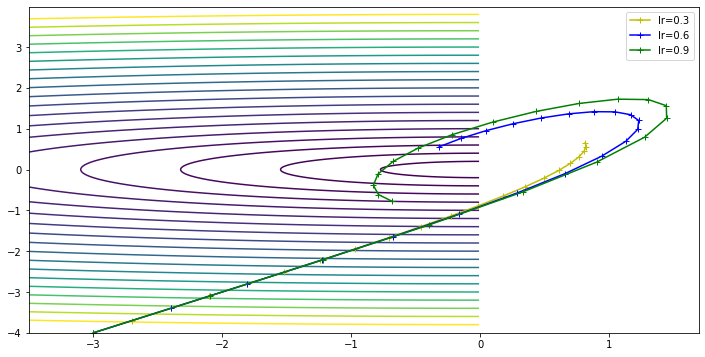

In [80]:
xhist03a, yhist03a = get_costs_adam(0.3)
xhist06a, yhist06a = get_costs_adam(0.6)
xhist09a, yhist09a = get_costs_adam(0.9)

plt.figure(5, figsize=(12, 6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)
plt.plot(xhist03a, yhist03a, 'y-+', label='lr=0.3')
plt.plot(xhist06a, yhist06a, 'b-+', label='lr=0.6')
plt.plot(xhist09a, yhist09a, 'g-+', label='lr=0.9')
plt.legend()
print('SGD - lr=0.3', error(xhist03a, yhist03a))
print('SGD - lr=0.6', error(xhist06a, yhist06a))
print('SGD - lr=0.9', error(xhist09a, yhist09a))

Even with very different learning rates, Adam achieves similar results after reasonalbe epochs. There is no crazy behavior like it can occur with SGD.

## Overview of the Best

SGD - lr=0.9  0.010, (-0.010,  0.000)
SGD - lr=0.3 m=0.7  0.009, ( 0.009, -0.002)
SGD - lr=0.6 m=0.6 n  0.003, ( 0.003, -0.000)
Adam - lr=0.6  0.008, (-0.008, -0.002)


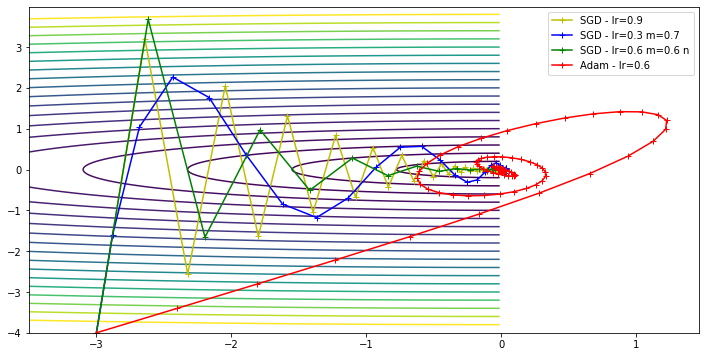

In [101]:
xhist0945, yhist0945 = get_costs_sgd(0.9, nepochs=45)
xhist030735, yhist030735 = get_costs_sgd(0.3, 0.7, nepochs=35)
xhist0606n20, yhist0606n20 = get_costs_sgd(0.6, 0.6, True, nepochs=20)
xhist06a110, yhist06a110 = get_costs_adam(0.6, 110)

plt.figure(6, figsize=(12, 6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)
plt.plot(xhist0945, yhist0945, 'y-+', label='SGD - lr=0.9')
plt.plot(xhist030735, yhist030735, 'b-+', label='SGD - lr=0.3 m=0.7')
plt.plot(xhist0606n20, yhist0606n20, 'g-+', label='SGD - lr=0.6 m=0.6 n')
plt.plot(xhist06a110, yhist06a110, 'r-+', label='Adam - lr=0.6')
plt.legend()
print('SGD - lr=0.9', error(xhist0945, yhist0945))
print('SGD - lr=0.3 m=0.7', error(xhist030735, yhist030735))
print('SGD - lr=0.6 m=0.6 n', error(xhist0606n20, yhist0606n20))
print('Adam - lr=0.6', error(xhist06a110, yhist06a110))

In [109]:
def get_number_of_epochs_until_error_smaller(algorithm, lr, momentum = 0.0, nesterov = False, max_error = 1e-3):

    def error(xhist, yhist):
        x, y = xhist[-1], yhist[-1]
        return np.sqrt(x**2 + y**2)

    nepochs = 1
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    if algorithm is torch.optim.Adam:
        optimizer = algorithm([x], lr=lr)
    elif algorithm is torch.optim.SGD:
        optimizer = algorithm([x], lr=lr, momentum=momentum, nesterov=nesterov)
    while error(*optimize(test_function, x, nepochs, optimizer)) > max_error:
        nepochs += 1
    return nepochs

In [111]:
sgd_09 = get_number_of_epochs_until_error_smaller(torch.optim.SGD, 0.9)
sgd_03_07 = get_number_of_epochs_until_error_smaller(torch.optim.SGD, 0.3, 0.7)
sgd_06_06_n = get_number_of_epochs_until_error_smaller(torch.optim.SGD, 0.6, 0.6, True)
adam_06 = get_number_of_epochs_until_error_smaller(torch.optim.Adam, 0.6)

print('How many epochs until max error smaller than 1e-3?')
print(f'SGD with a learning rate of 0.9 takes {sgd_09} epochs')
print(f'SGD with a learning rate of 0.3 and momentum 0.7 takes {sgd_03_07} epochs')
print(f'SGD with a learning rate of 0.6, momentum 0.6 and Nesterov takes {sgd_06_06_n} epochs')
print(f'Adam with a learning rate of 0.6 takes {adam_06} epochs')

How many epochs until max error smaller than 1e-3?
SGD with a learning rate of 0.9 takes 11 epochs
SGD with a learning rate of 0.3 and momentum 0.7 takes 9 epochs
SGD with a learning rate of 0.6, momentum 0.6 and Nesterov takes 8 epochs
Adam with a learning rate of 0.6 takes 17 epochs


|   Optimizer   |   LR  |   Momentum    |   Nesterov | # until error <= 1e-3 |
|---------------|:-----:|:-------------:|:----------:|----------------------:|
|      SGD      |  0.9  |      0.0      |     no     |           11          |
|      SGD      |  0.3  |      0.7      |     no     |            9          |
|      SGD      |  0.6  |      0.6      |     yes    |            8          |
|      Adam     |  0.6  |       -       |      -     |           17          |